In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

# 데이터 준비 및 확인
* 기상자료개방포털 > 데이터 > 기상관측 > 지상 > 종관기상관측(ASOS)<br>
https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36<br>
[ 자료형태 ] 일자료<br>
[ 지점 ] 전체<br>
[ 자료 ] 기온>최저,최고,평균<br>
[ 기간 ] 1911~2020 (10년단위로 나누어 다운로드)


## 데이터프레임 생성

In [3]:
df_1911 = pd.read_csv('시각화_data/1911-1920 일별 기온.csv', encoding='cp949')
df_1921 = pd.read_csv('시각화_data/1921-1930 일별 기온.csv', encoding='cp949')
df_1931 = pd.read_csv('시각화_data/1931-1940 일별 기온.csv', encoding='cp949')
df_1941 = pd.read_csv('시각화_data/1941-1950 일별 기온.csv', encoding='cp949')
df_1951 = pd.read_csv('시각화_data/1951-1960 일별 기온.csv', encoding='cp949')
df_1961 = pd.read_csv('시각화_data/1961-1970 일별 기온.csv', encoding='cp949')
df_1971 = pd.read_csv('시각화_data/1971-1980 일별 기온.csv', encoding='cp949')
df_1981 = pd.read_csv('시각화_data/1981-1990 일별 기온.csv', encoding='cp949')
df_1991 = pd.read_csv('시각화_data/1991-2000 일별 기온.csv', encoding='cp949')
df_2001 = pd.read_csv('시각화_data/2001-2010 일별 기온.csv', encoding='cp949')
df_2011 = pd.read_csv('시각화_data/2011-2020 일별 기온.csv', encoding='cp949')

In [4]:
# 데이터프레임 연결하기
df = pd.concat([df_1911,df_1921,df_1931,df_1941,df_1951,df_1961,df_1971,df_1981,df_1991,df_2001,df_2011]
              ,ignore_index=True)

In [5]:
df.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,105,강릉,1911-10-04,NaN,12.2,26.2
1,105,강릉,1911-10-09,NaN,6.0,16.6
2,105,강릉,1911-10-16,NaN,9.2,15.5
3,105,강릉,1911-11-01,NaN,6.0,14.8
4,105,강릉,1911-11-04,NaN,10.2,19.5


In [7]:
df.tail()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1596830,295,남해,2020-12-27,4.4,2.5,6.0
1596831,295,남해,2020-12-28,4.7,1.1,11.5
1596832,295,남해,2020-12-29,5.4,1.0,11.2
1596833,295,남해,2020-12-30,-3.0,-5.4,1.6
1596834,295,남해,2020-12-31,-1.3,-7.4,2.8


## 데이터 확인

In [8]:
df.shape

(1596835, 6)

In [9]:
df['지점명'].unique()

array(['강릉', '서울', '인천', '대구', '전주', '부산', '목포', '제주', '울릉도', '추풍령', '광주',
       '포항', '울산', '여수', '속초', '춘천', '수원', '서산', '청주', '대전', '군산', '통영',
       '서귀포', '진주', '임실', '정읍', '대관령', '원주', '충주', '울진', '안동', '완도', '성산',
       '강화', '양평', '이천', '인제', '홍천', '삼척', '제천', '보은', '천안', '보령', '부여',
       '금산', '부안', '남원', '고창군', '주암', '장흥', '해남', '고흥', '성산포', '영주', '문경',
       '영덕', '의성', '구미', '영천', '거창', '합천', '밀양', '산청', '거제', '남해', '철원',
       '관악산', '창원', '고산', '태백', '장수', '봉화', '동두천', '백령도', '동해', '영월',
       '무안', '흑산도', '파주', '북강릉', '상주', '고창', '진도(첨찰산)', '정선군', '영광군',
       '김해시', '순창군', '북창원', '양산시', '보성군', '강진군', '의령군', '함양군', '청송군',
       '경주시', '북춘천', '순천', '대구(기)', '홍성', '세종', '광양시', '진도군'],
      dtype=object)

In [10]:
df['지점명'].nunique()

102

## 데이터타입 확인/변경

In [11]:
df.dtypes

지점            int64
지점명          object
일시           object
평균기온(°C)    float64
최저기온(°C)    float64
최고기온(°C)    float64
dtype: object

In [12]:
df['일시'] = pd.to_datetime(df['일시'])

In [13]:
df.dtypes

지점                   int64
지점명                 object
일시          datetime64[ns]
평균기온(°C)           float64
최저기온(°C)           float64
최고기온(°C)           float64
dtype: object

## 2020년 지점별 기온 데이터 추출 및 전처리

### 2020년 기온 데이터 추출하여 서브셋 만들기
* 조건으로 데이터를 추출한다.
* 필요한 컬럼을 추출한다.
* .copy()를 사용하여 카피본으로 서브셋을 만든다.

In [14]:
# 서브셋 만들기
df_2020 = df[df['일시'].dt.year==2020].copy()
df_2020

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1257132,90,속초,2020-01-01,0.8,-3.4,4.8
1257133,90,속초,2020-01-02,2.8,-2.1,6.6
1257134,90,속초,2020-01-03,4.7,0.8,8.5
1257135,90,속초,2020-01-04,4.0,1.1,8.1
1257136,90,속초,2020-01-05,3.1,-0.6,8.8
...,...,...,...,...,...,...
1596830,295,남해,2020-12-27,4.4,2.5,6.0
1596831,295,남해,2020-12-28,4.7,1.1,11.5
1596832,295,남해,2020-12-29,5.4,1.0,11.2
1596833,295,남해,2020-12-30,-3.0,-5.4,1.6


In [15]:
# 지점별 데이터 개수 카운트
df_2020['지점명'].value_counts()

속초     366
세종     366
순창군    366
김해시    366
영광군    366
      ... 
군산     366
포항     366
남해     366
북창원    365
진도군    364
Name: 지점명, Length: 95, dtype: int64

### 결측치 확인

In [16]:
# 컬럼별 결측치 개수 확인
df_2020.isnull().sum()

지점           0
지점명          0
일시           0
평균기온(°C)    36
최저기온(°C)     0
최고기온(°C)     1
dtype: int64

In [17]:
# 결측치 데이터 확인
df_2020[(df_2020['평균기온(°C)'].isnull()) | (df_2020['최고기온(°C)'].isnull())]

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1324672,130,울진,2020-08-23,NaN,22.1,27.9
1335657,135,추풍령,2020-09-18,NaN,13.8,23.7
1335664,135,추풍령,2020-09-25,NaN,11.6,23.6
1350113,140,군산,2020-04-15,NaN,4.7,17.0
1350343,140,군산,2020-12-01,NaN,-1.5,8.4
1394163,172,고창,2020-11-19,NaN,11.5,22.2
1397420,174,순천,2020-01-18,NaN,-1.7,4.1
1435973,211,인제,2020-02-20,NaN,-2.7,9.8
1446909,217,정선군,2020-01-30,NaN,-1.2,6.1
1461703,235,보령,2020-07-30,NaN,22.9,26.3


In [18]:
# 결측치가 있는 데이터의 지점별 카운팅
df_2020[(df_2020['평균기온(°C)'].isnull()) | (df_2020['최고기온(°C)'].isnull())].value_counts('지점명')

지점명
의령군    5
함양군    3
남원     3
해남     2
추풍령    2
군산     2
청송군    1
진도군    1
정읍     1
정선군    1
임실     1
인제     1
의성     1
거제     1
울진     1
고창     1
영주     1
영덕     1
양산시    1
순천     1
북창원    1
보령     1
구미     1
광양시    1
영천     1
dtype: int64

In [19]:
# 결측치 제거
df_2020.dropna(inplace=True)

In [20]:
# 결측치 잘 제거되었는지 확인
df_2020.isnull().sum()

지점          0
지점명         0
일시          0
평균기온(°C)    0
최저기온(°C)    0
최고기온(°C)    0
dtype: int64

In [21]:
# 지점별 데이터 개수 확인
df_2020['지점명'].value_counts()

속초     366
완도     366
금산     366
부여     366
천안     366
      ... 
군산     364
진도군    363
함양군    363
남원     363
의령군    361
Name: 지점명, Length: 95, dtype: int64

# 지점별 연평균 기온 시각화
* 연 평균기온이 높은 지역은 어디일까?
* 연 평균기온이 낮은 지역은 어디일까?
* 서울의 연 평균기온은 전국에서 어느정도 위치에 해당할까?

## 2020년도 지점별 연 평균기온 추출
* 지점별 연간 일 평균기온의 평균 계산<br>
지점명으로 그룹핑하여 일평균기온의 평균 계산

In [22]:
df_2020_mean = df_2020.groupby('지점명')['평균기온(°C)'].mean().sort_values(ascending=False)
df_2020_mean

지점명
서귀포    16.770219
제주     16.744809
고산     16.076503
성산     15.981148
북창원    15.206593
         ...    
철원     10.976776
제천     10.973497
봉화     10.821038
태백      9.631421
대관령     7.787978
Name: 평균기온(°C), Length: 95, dtype: float64

## 시각화

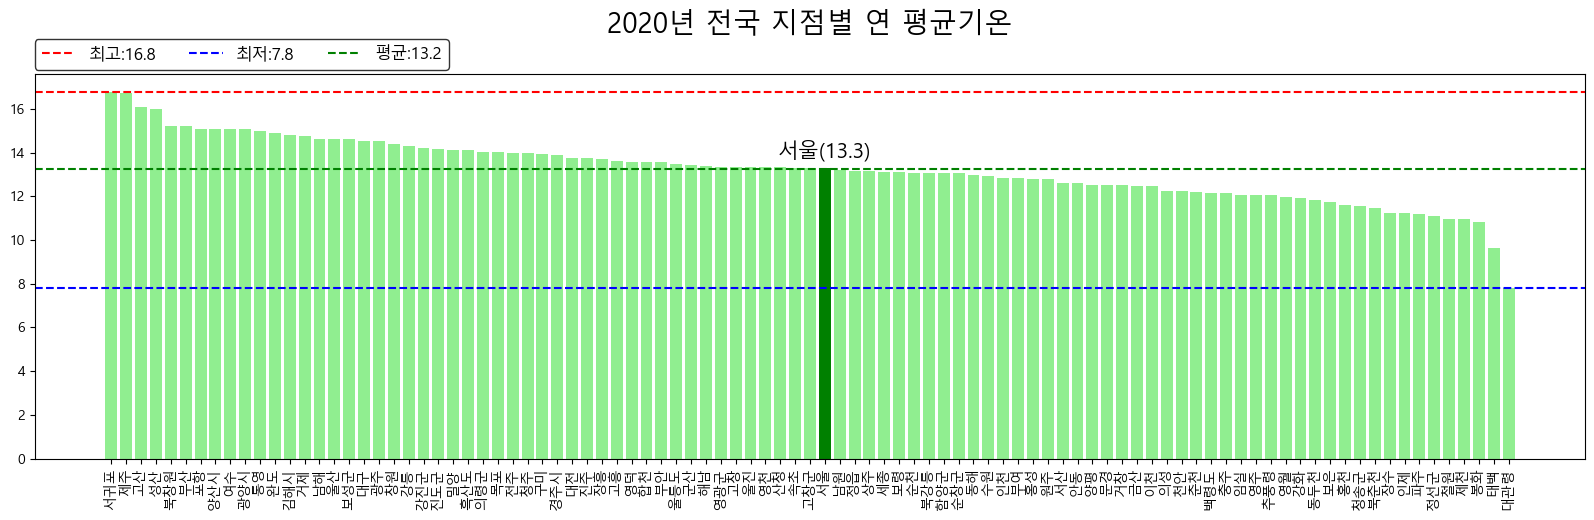

In [23]:
# 지점별 연 평균기온
plt.figure(figsize=(20,5))
plt.bar(df_2020_mean.index, df_2020_mean.values, color='lightgreen')
plt.xticks(rotation=90)

# 최고, 평균, 최저 라인 표시
plt.axhline(df_2020_mean.max(), color='r', ls='--', label='최고:'+str(round(df_2020_mean.max(),1)))
plt.axhline(df_2020_mean.min(), color='b', ls='--', label='최저:'+str(round(df_2020_mean.min(),1)))
plt.axhline(df_2020_mean.mean(), color='g', ls='--', label='평균:'+str(round(df_2020_mean.mean(),1)))
plt.legend(loc=(0,1.01), ncol=3, fontsize=12, edgecolor='k')

# 서울지역 표시
plt.bar('서울', df_2020_mean.loc['서울'], color='g')
plt.text('서울', df_2020_mean.loc['서울']+0.5, '서울('+str(round(df_2020_mean.loc['서울'],1))+')'
         , ha='center', fontsize=15)

plt.title('2020년 전국 지점별 연 평균기온', size=20, pad=30)

plt.show()

# 지점별 연 최저기온, 최고기온 시각화

* 연 최저기온이 높은 지역은 어디일까?
* 연 최저기온이 낮은 지역은 어디일까?
* 서울의 연 최저기온은 전국에서 어느정도 위치에 해당할까?

## 지점별 연 최저기온

### 지점별 연 최저기온 추출

In [24]:
# 지점명으로 그룹화하여 지점별 연 최저기온 추출
df_2020_cold = df_2020.groupby('지점명')['최저기온(°C)'].min().sort_values(ascending=False)
df_2020_cold

지점명
제주     -1.4
고산     -1.4
서귀포    -2.1
성산     -2.8
흑산도    -3.3
       ... 
홍천    -18.2
북춘천   -18.5
철원    -18.8
제천    -20.3
대관령   -24.0
Name: 최저기온(°C), Length: 95, dtype: float64

### 시각화

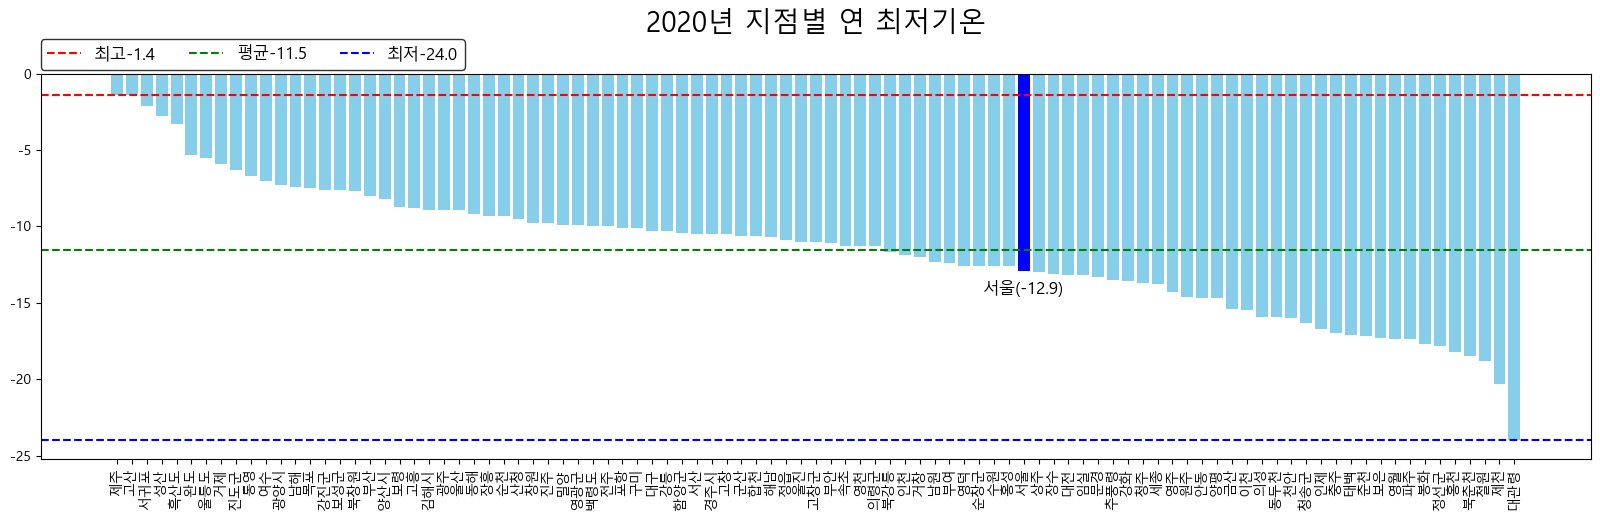

In [25]:
# 지점별 연 최저기온
plt.figure(figsize=(20,5))
plt.bar(df_2020_cold.index, df_2020_cold.values, color='skyblue')
plt.xticks(rotation=90)
plt.title('2020년 지점별 연 최저기온', size=20, pad=30)

# 최저, 평균, 최고지점 표시
plt.axhline(df_2020_cold.max(), color='r', ls='--', label='최고'+str(df_2020_cold.max()))
plt.axhline(df_2020_cold.mean(), color='g', ls='--', label='평균'+str(round(df_2020_cold.mean(),1)))
plt.axhline(df_2020_cold.min(), color='b', ls='--', label='최저'+str(df_2020_cold.min()))
plt.legend(loc=(0,1.01), ncol=3, fontsize=12, edgecolor='k')

# 서울 표시
plt.bar('서울', df_2020_cold.loc['서울'], color='b')
plt.text('서울', df_2020_cold.loc['서울']-1.5, '서울('+str(df_2020_cold.loc['서울'])+')'
         , ha='center', fontsize=12)

plt.show()

## 지점별 연 최고기온

### 지점별 연 최고기온 추출

In [26]:
# 지점명으로 그룹화하여 지점별 연 최고기온 추출
df_2020_hot = df_2020.groupby('지점명')['최고기온(°C)'].max().sort_values(ascending=False)
df_2020_hot

지점명
양산시    37.8
대구     37.0
경주시    36.9
포항     36.9
북창원    36.9
       ... 
여수     32.6
울릉도    32.0
대관령    31.6
서귀포    31.3
백령도    30.5
Name: 최고기온(°C), Length: 95, dtype: float64

### 시각화

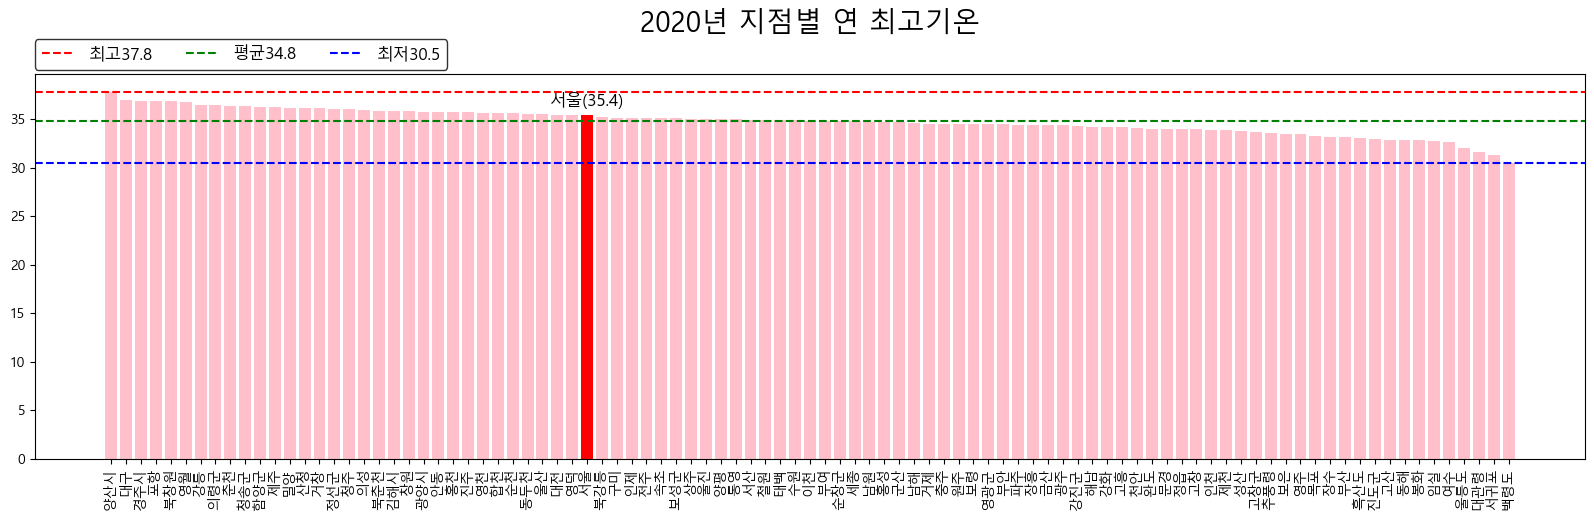

In [27]:
# 지점별 연 최고기온
plt.figure(figsize=(20,5))
plt.bar(df_2020_hot.index, df_2020_hot.values, color='pink')
plt.xticks(rotation=90)
plt.title('2020년 지점별 연 최고기온', size=20, pad=30)

# 최저, 평균, 최고지점 표시
plt.axhline(df_2020_hot.max(), color='r', ls='--', label='최고'+str(df_2020_hot.max()))
plt.axhline(df_2020_hot.mean(), color='g', ls='--', label='평균'+str(round(df_2020_hot.mean(),1)))
plt.axhline(df_2020_hot.min(), color='b', ls='--', label='최저'+str(df_2020_hot.min()))
plt.legend(loc=(0,1.01), ncol=3, fontsize=12, edgecolor='k')

# 서울 표시

plt.bar('서울', df_2020_hot.loc['서울'], color='r')
plt.text('서울', df_2020_hot.loc['서울']+1, '서울('+str(df_2020_hot.loc['서울'])+')'
         , ha='center', fontsize=12)

plt.show()# 지점별 연 최고기온

# 최저, 평균, 최고지점 표시

# 서울 표시

# 지점별 기온 분포 시각화 - 히스토그램

## 서귀포, 서울, 대관령 서브셋 만들기

In [28]:
# 서귀포 서브셋
df_2020_sgp = df_2020[df_2020['지점명']=='서귀포'].copy()
df_2020_sgp

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1417659,189,서귀포,2020-01-01,7.0,4.8,9.6
1417660,189,서귀포,2020-01-02,8.7,5.6,12.7
1417661,189,서귀포,2020-01-03,9.5,6.1,13.4
1417662,189,서귀포,2020-01-04,9.7,6.2,14.0
1417663,189,서귀포,2020-01-05,9.6,6.1,12.8
...,...,...,...,...,...,...
1418020,189,서귀포,2020-12-27,10.9,9.9,11.9
1418021,189,서귀포,2020-12-28,11.7,7.9,15.5
1418022,189,서귀포,2020-12-29,12.5,9.9,15.2
1418023,189,서귀포,2020-12-30,0.7,-2.1,10.0


In [29]:
# 서울 서브셋
df_2020_seoul = df_2020[df_2020['지점명']=='서울'].copy()
df_2020_seoul

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1295215,108,서울,2020-01-01,-2.2,-6.5,0.3
1295216,108,서울,2020-01-02,1.0,-0.7,3.8
1295217,108,서울,2020-01-03,-0.1,-3.4,4.6
1295218,108,서울,2020-01-04,1.2,-2.8,6.1
1295219,108,서울,2020-01-05,1.3,-3.2,6.6
...,...,...,...,...,...,...
1295576,108,서울,2020-12-27,5.8,1.4,10.0
1295577,108,서울,2020-12-28,6.7,4.2,11.4
1295578,108,서울,2020-12-29,0.1,-6.2,4.3
1295579,108,서울,2020-12-30,-10.9,-12.9,-6.2


In [30]:
# 대관령 서브셋
df_2020_dgr = df_2020[df_2020['지점명']=='대관령'].copy()
df_2020_dgr

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1273297,100,대관령,2020-01-01,-6.5,-11.5,-2.5
1273298,100,대관령,2020-01-02,-4.4,-9.0,-0.4
1273299,100,대관령,2020-01-03,-3.2,-7.4,2.5
1273300,100,대관령,2020-01-04,-4.2,-9.9,1.6
1273301,100,대관령,2020-01-05,-5.5,-14.2,4.6
...,...,...,...,...,...,...
1273658,100,대관령,2020-12-27,-1.1,-4.2,5.3
1273659,100,대관령,2020-12-28,1.0,-4.9,8.0
1273660,100,대관령,2020-12-29,-3.0,-8.0,4.5
1273661,100,대관령,2020-12-30,-14.2,-18.3,-5.4


## 서귀포, 서울, 대관령 일 평균기온 히스토그램

In [31]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

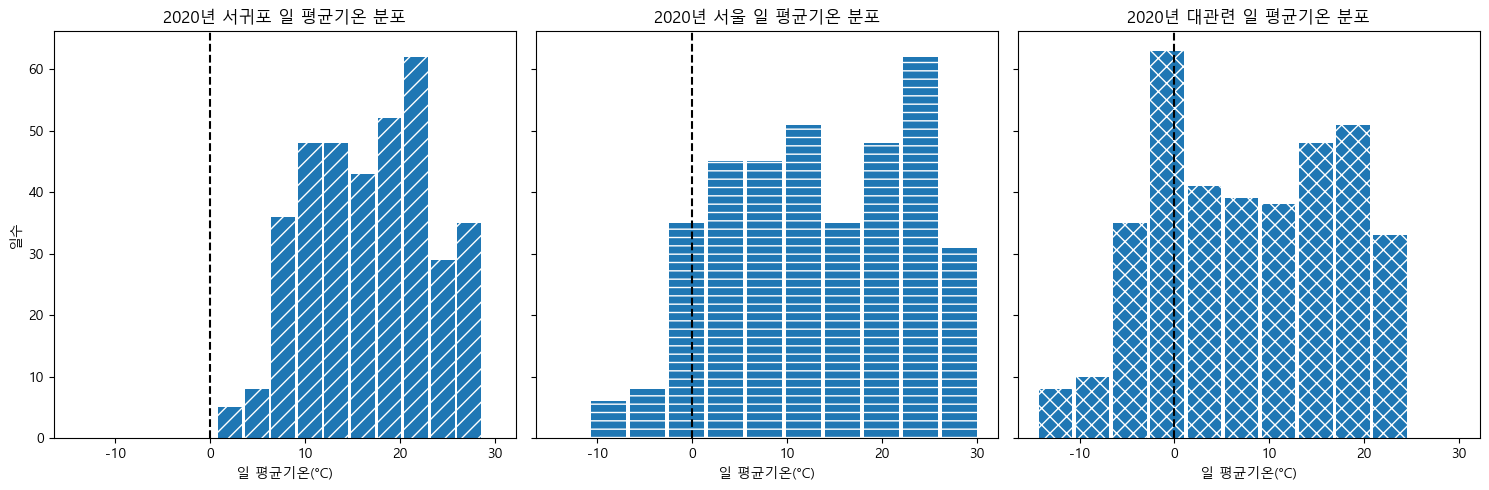

In [32]:
# 스타일 파라미터
plt.rcParams['hatch.color']='w'

# 서브플롯 만들기(plt.subplots())
fig, ax = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)

# 서귀포 일평균기온 히스토그램
ax[0].hist(df_2020_sgp['평균기온(°C)'], rwidth=0.9, hatch='//')
ax[0].set_title('2020년 서귀포 일 평균기온 분포')
ax[0].set_xlabel('일 평균기온(°C)')
ax[0].set_ylabel('일수')


# 서울 일평균기온 히스토그램
ax[1].hist(df_2020_seoul['평균기온(°C)'], rwidth=0.9, hatch='--')
ax[1].set_title('2020년 서울 일 평균기온 분포')
ax[1].set_xlabel('일 평균기온(°C)')

# 대관령
ax[2].hist(df_2020_dgr['평균기온(°C)'], rwidth=0.9, hatch='xx')
ax[2].set_title('2020년 대관련 일 평균기온 분포')
ax[2].set_xlabel('일 평균기온(°C)')

# 0°C 수직선 표시
ax[0].axvline(0, color='k', ls='--')
ax[1].axvline(0, color='k', ls='--')
ax[2].axvline(0, color='k', ls='--')

plt.tight_layout()
plt.show()

# 지점별 기온분포 시각화 - 박스플롯, 바이올린플롯
* 서귀포, 서울, 대관령 지점 2020년 평균기온 서브셋

In [33]:
df_2020_sgp.head(1)

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1417659,189,서귀포,2020-01-01,7.0,4.8,9.6


In [34]:
df_2020_seoul.head(1)

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1295215,108,서울,2020-01-01,-2.2,-6.5,0.3


In [35]:
df_2020_dgr.head(1)

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1273297,100,대관령,2020-01-01,-6.5,-11.5,-2.5


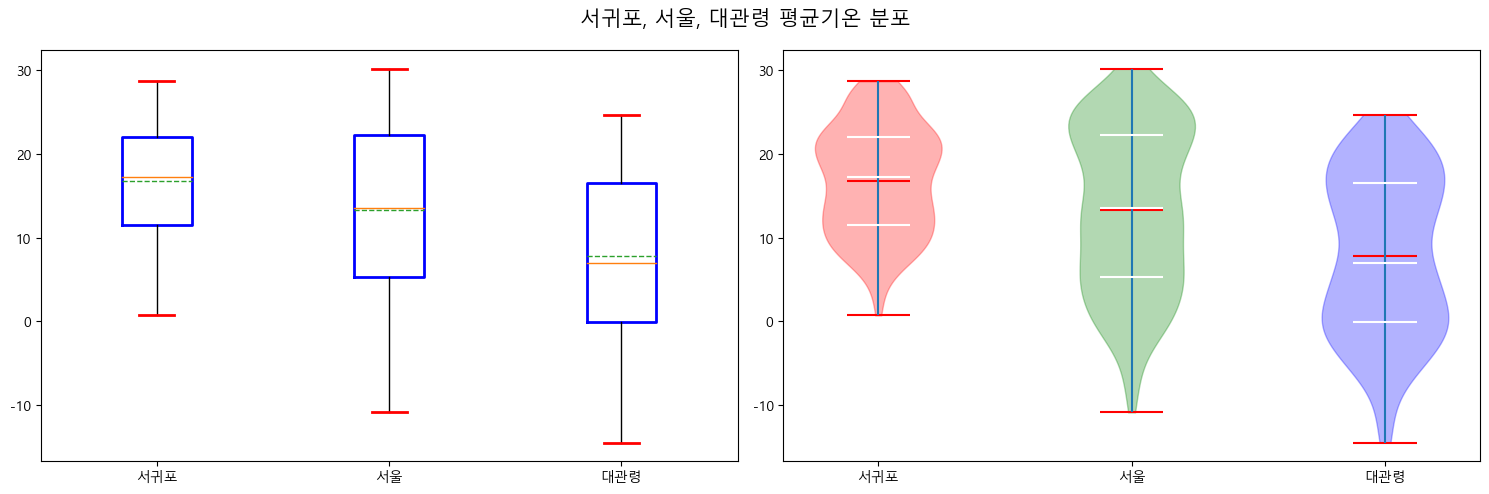

In [36]:
# 서브플롯 그리기
# 서브플롯 그리기
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 박스플롯
plt.rcParams['boxplot.boxprops.color']='b'
plt.rcParams['boxplot.boxprops.linewidth']=2
plt.rcParams['boxplot.capprops.color']='r'
plt.rcParams['boxplot.capprops.linewidth']=2
plt.rcParams['boxplot.meanline']=True

ax1.boxplot([df_2020_sgp['평균기온(°C)'], df_2020_seoul['평균기온(°C)'], df_2020_dgr['평균기온(°C)']],
           labels=['서귀포','서울','대관령'], showmeans=True)

# 바이올린플롯
v = ax2.violinplot([df_2020_sgp['평균기온(°C)'], df_2020_seoul['평균기온(°C)'], df_2020_dgr['평균기온(°C)']]
              ,showmeans=True, showmedians=True, quantiles=[[0.25,0.75],[0.25,0.75],[0.25,0.75]])

v['bodies'][0].set_color('r')
v['bodies'][1].set_color('g')
v['bodies'][2].set_color('b')
v['cmins'].set_edgecolor('r')
v['cmaxes'].set_edgecolor('r')
v['cmeans'].set_edgecolor('r')
v['cmedians'].set_edgecolor('w')
v['cquantiles'].set_edgecolor('w')

ax2.set_xticks(range(1,4,1))
ax2.set_xticklabels(['서귀포','서울','대관령'])


fig.suptitle('서귀포, 서울, 대관령 평균기온 분포', size=15)
fig.tight_layout()

plt.show()
# 박스플롯

# 바이올린플롯